In [1]:
import spacy
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load("en_core_web_md")

/Users/lukas/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from docx import Document

In [6]:
document = Document('./../Bachelor_Thesis_stefan.docx')

In [7]:
paragraphs = document.paragraphs
text = ''

for i, p in enumerate(paragraphs):
    if len(p.text) > 100:
        text += p.text

In [8]:
doc = nlp(text)

In [9]:
for ent in doc.ents: 
    print(ent.text, ent.label_)

Linde plc ORG
Dublin GPE
Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem Ipsum Lorem PERSON
Lorem IpsumIn PERSON
Linde plc ORG
Linde ORG
Enter

In [10]:
named_ents_dic = {}
for ent in doc.ents:
    if ent.label_ in named_ents_dic:
        named_ents_dic[ent.label_] += 1
    else:
        named_ents_dic[ent.label_] = 1

In [11]:
sorted_ents_dic = {k: v for k, v in sorted(named_ents_dic.items(), key=lambda item: item[1], reverse=True)}
print(sorted_ents_dic)

{'ORG': 417, 'CARDINAL': 130, 'GPE': 76, 'PRODUCT': 45, 'LAW': 32, 'PERSON': 27, 'ORDINAL': 26, 'DATE': 26, 'LOC': 13, 'MONEY': 11, 'NORP': 9, 'PERCENT': 8, 'WORK_OF_ART': 6, 'EVENT': 4, 'FAC': 1, 'TIME': 1}


In [12]:
from spacy import displacy
displacy.render(doc, style='ent')

In [13]:
import pandas as pd

data = {'Named Entities': list(sorted_ents_dic.keys()),
        'Found in Document' : list(sorted_ents_dic.values())
        }

df = pd.DataFrame(data=data)

In [14]:
print(df.head())

  Named Entities  Found in Document
0            ORG                417
1       CARDINAL                130
2            GPE                 76
3        PRODUCT                 45
4            LAW                 32


In [15]:
total_entities = df['Found in Document'].sum()
percentage = [x / total_entities for x in df['Found in Document'].tolist()]
df['Percentage'] = percentage

In [16]:
data = [ent + ': ' + spacy.explain(ent) for ent in df['Named Entities'].tolist()]
df.insert(1, 'Definition', data)

In [17]:
df.to_excel('Named_Entities.xlsx')

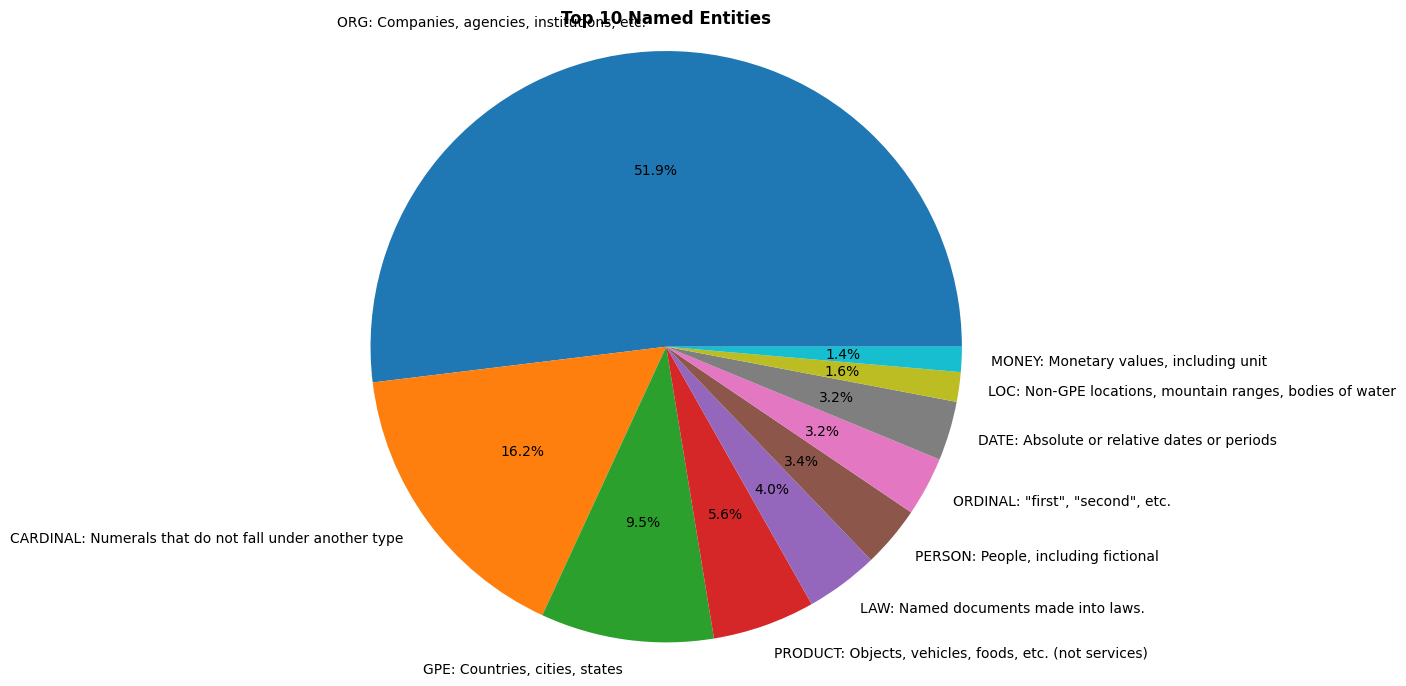

In [18]:
labels = df['Named Entities'].tolist()[0:10]
definitions = df['Definition'].tolist()[0:10]
percentage = df['Percentage'].tolist()[0:10]

fig, ax = plt.subplots()
plt.title("Top 10 Named Entities", fontweight='bold' ,pad=100)
ax.pie(percentage, labels=definitions, autopct='%1.1f%%', radius=2)
plt.show()